# K-Means Clustering

Deskripsi     : Script berikut ini adalah script yang digunakan untuk melakukan K-Means Clustering

Dataset       : Dataset Dummy yang terdiri dari dua variabel, yaitu variabel gaji dan pengeluaran

Referensi     : Buku Fundamental with Python (by Teguh Wahyono)

Curated by    : B. Ari Kuncoro (IYKRA)

## Latar Belakang

Sebuah perusahaan melakukan penelitian terhadap data-data konsumen yang dimilikinya. Perusahaan tersebut akan melakukan pengelompokan data ke dalam beberapa cluster berdasarkan kriteria besaran gaji yang diterima dan pengeluaran per bulannya. 


## Bagaimana cara melakukan clustering?

Langkah pertama yang mesti kita lakukan adalah dengan memanggil library atau pustaka yang dibutuhkan, yaitu matplotlib, numpy, pandas, dan sklearn. 

In [67]:
# Step 1. Memanggil Library yang dibutuhkan 

%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans

Langkah kedua adalah memanggil Dataset 

In [75]:
# Step 2. Memanggil dataset 
dataset = pd.read_csv('Data_2014.csv')
dataset.keys()

Index(['pintu_masuk', 'januari', 'februari', 'maret', 'april', 'mei', 'juni',
       'juli', 'agustus', 'september', 'oktober', 'november', 'desember'],
      dtype='object')

In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 13 columns):
pintu_masuk    20 non-null object
januari        20 non-null float64
februari       20 non-null float64
maret          20 non-null float64
april          20 non-null float64
mei            20 non-null float64
juni           20 non-null float64
juli           20 non-null float64
agustus        20 non-null float64
september      20 non-null float64
oktober        20 non-null float64
november       20 non-null float64
desember       20 non-null float64
dtypes: float64(12), object(1)
memory usage: 2.1+ KB


In [77]:
dataset.head()

,pintu_masuk,januari,februari,maret,april,mei,juni,juli,agustus,september,oktober,november,desember
0,Soekarno-Hatta,187123.0,180362.0,194720.0,180787.0,184534.0,208624.0,169135.0,218903.0,174169.0,177274.0,180208.0,190598.0
1,Ngurah Rai,278685.0,269367.0,268418.0,277925.0,285965.0,329654.0,358907.0,336628.0,352017.0,339200.0,293858.0,341111.0
2,Kualanamu Int'.,19029.0,17780.0,18493.0,15956.0,19781.0,19376.0,16579.0,16901.0,17792.0,20946.0,22848.0,29243.0
3,Batam,119054.0,97445.0,122019.0,111929.0,115323.0,140218.0,101966.0,111455.0,113090.0,126169.0,123505.0,171907.0
4,Sam Ratulangi,1694.0,1079.0,1340.0,1079.0,1365.0,1487.0,1652.0,1854.0,1652.0,1642.0,943.0,1492.0


In [78]:
dataset.index=dataset['pintu_masuk']

In [79]:
dataset=dataset.iloc[:,1:13]

In [80]:
# Menampilkan 5 baris data pertama 
dataset.head() #untuk menampilkan 5 baris data pertama 

,januari,februari,maret,april,mei,juni,juli,agustus,september,oktober,november,desember
pintu_masuk,,,,,,,,,,,,
Soekarno-Hatta,187123.0,180362.0,194720.0,180787.0,184534.0,208624.0,169135.0,218903.0,174169.0,177274.0,180208.0,190598.0
Ngurah Rai,278685.0,269367.0,268418.0,277925.0,285965.0,329654.0,358907.0,336628.0,352017.0,339200.0,293858.0,341111.0
Kualanamu Int'.,19029.0,17780.0,18493.0,15956.0,19781.0,19376.0,16579.0,16901.0,17792.0,20946.0,22848.0,29243.0
Batam,119054.0,97445.0,122019.0,111929.0,115323.0,140218.0,101966.0,111455.0,113090.0,126169.0,123505.0,171907.0
Sam Ratulangi,1694.0,1079.0,1340.0,1079.0,1365.0,1487.0,1652.0,1854.0,1652.0,1642.0,943.0,1492.0


In [29]:
dataset=dataset.iloc[1:11]

Langkah ketiga adalah dengan melakukan konversi dataset ke data array 

In [81]:
# Step 3. Konversi Dataset ke Data Array 
X = np.asarray(dataset)

Langkah keempat adalah menampilkan Data Array ke dalam Scatter plot 

Text(0.5,1,'Grafik Konsumen')

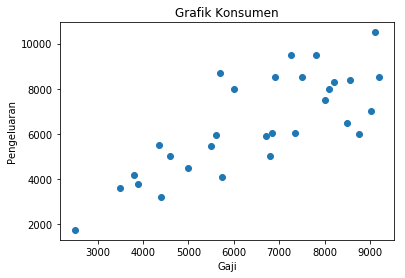

In [5]:
## Step 4. Menampilkan data ke dalam grafik scatterplot 
plt.scatter(X[:,0],X[:,1], label = 'True Position')
plt.xlabel("Gaji")
plt.ylabel("Pengeluaran")
plt.title("Grafik Konsumen")

Langkah kelima adalah melakukan algoritma K-Means dengan jumlah K yang ditentukan dengan scree plot

In [82]:
X

array([[187123., 180362., 194720., 180787., 184534., 208624., 169135.,
        218903., 174169., 177274., 180208., 190598.],
       [278685., 269367., 268418., 277925., 285965., 329654., 358907.,
        336628., 352017., 339200., 293858., 341111.],
       [ 19029.,  17780.,  18493.,  15956.,  19781.,  19376.,  16579.,
         16901.,  17792.,  20946.,  22848.,  29243.],
       [119054.,  97445., 122019., 111929., 115323., 140218., 101966.,
        111455., 113090., 126169., 123505., 171907.],
       [  1694.,   1079.,   1340.,   1079.,   1365.,   1487.,   1652.,
          1854.,   1652.,   1642.,    943.,   1492.],
       [ 16870.,  16476.,  18776.,  19145.,  20299.,  18685.,  16174.,
         18239.,  17124.,  17997.,  18324.,  19084.],
       [  1535.,   1609.,   1699.,   1430.,   1785.,   1703.,   2488.,
          1568.,   1445.,   1731.,   1936.,   3535.],
       [   774.,    803.,   1114.,   1029.,   1692.,   1042.,   1125.,
          1399.,   1258.,   1122.,    853.,    700.],


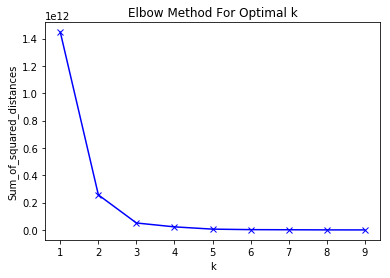

In [83]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [84]:
# Step 5. Melakukan aktivasi algoritma K-Means 
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Langkah keenam adalah menampilkan nilai centroid dan label data point 

In [85]:
# Step 6. Menampilkan nilai centroid yang dibangkitkan oleh algoritma kmeans 
print(kmeans.cluster_centers_)

[[  9895.11764706   9146.58823529  10614.70588235   9158.29411765
    9796.52941176  10175.23529412   8657.17647059   9402.05882353
    8942.35294118   9772.           9817.05882353  12454.        ]
 [194954.         182391.33333333 195052.33333333 190213.66666667
  195274.         226165.33333333 210002.66666667 222328.66666667
  213092.         214214.33333333 199190.33333333 234538.66666667]]


In [96]:
labels=pd.DataFrame(kmeans.labels_)

In [97]:
labels.index=dataset.index

In [86]:
print(kmeans.labels_)

[1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [98]:
labels

,0
pintu_masuk,
Soekarno-Hatta,1
Ngurah Rai,1
Kualanamu Int'.,0
Batam,1
Sam Ratulangi,0
Juanda,0
Entikong,0
Adi Sumarmo,0
Minangkabau,0


Langkah ketujuh adalah visualisasi hasil clustering

In [90]:
# Memasukkan hasil label ke dalam suatu 
data_clustered = pd.DataFrame(X)
data_clustered['cluster'] = pd.DataFrame(kmeans.labels_)
data_clustered = data_clustered.sort_values('cluster')
data_clustered = np.asarray(data_clustered)

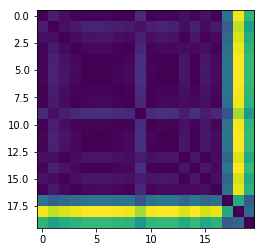

In [99]:
# Membuat similarity Matrix 
from scipy.spatial.distance import cdist
dist = cdist(data_clustered[:,0:2],data_clustered[:,0:2], metric='euclidean')
plt.imshow(dist)
plt.show()

In [100]:
# Menghitung Dunn's index 
# Mengingat tidak ada function Dunn's Index dalam sklearn, kita gunakan alternatif lain yaitu DB Index. 
# Silakan baca referensi berikut

Referensi: https://www.geeksforgeeks.org/dunn-index-and-db-index-cluster-validity-indices-set-1/ 

In [15]:
# Namun ketika dicoba, package sklearn mesti dinaikkan versinya menjadi versi 0.21.2
# Alternatif lain, kita bisa melakukan pembuatan function seperti pada referensi berikut ini: 

Referensi: https://gist.github.com/douglasrizzo/cd7e792ff3a2dcaf27f6